## Homework 4
### Theory Part

**Q1**  Consider a layer in CNN that takes in a single channel input of 64 × 64, and has 96
filters. In each of the following cases, compute the number of parameters that are learned in this
layer. We assume that bias is present for each weight.

[1] A convolution layer with filters of same size as the input.
$$ Param = (ksize^2 + 1)*channel$$ 
$$ Param = (64^2 + 1) * 96 $$
$$ Param = 393312 $$

In [1]:
(64**2 + 1)* 96 

393312


[2] A convolution layer with 8 × 8 filters with stride of 4

$$ Param = (ksize)^2 * channel + bias $$
$$ Param = (8^2 + 1) * 96 $$
$$ Param = 6240 $$



In [2]:
(8**2 + 1) * 96 

6240


[3]. A convolution layer with 1 × 1 filter and a stride of 1

$$ Param = (ksize)^2 * channel + bias $$
$$ Param = (1^2+ 1) * 96  $$
$$ Param = 192 $$

---

**Q2** Suppose you would have a neuron which has an RBF kernel as activation function (remember
the evil wolf? Drop your linear style of thoughts. Circumferential thoughts can be nice too.)

$$ y = exp(-(x_1^2 + x_2^2)) + b$$

with parameter b. _What would be the shapes realized by the set of points {$(x1, x2) : y((x1, x2)) =
0$} as a function of b ? Explain in at most 2 sentences and/or a little math._

$$ 0 = exp(-(x_1^2 + x_2^2)) + b $$

$$ -b = exp(-(x_1^2 + x_2^2)) $$

$$ -ln(-b) = x_1^2 + x_2^2 $$

Therefore, it is a circle centered around the origin with radius $\sqrt{-ln(-b)}$. Obviously this is only valid when $-1 < b < 0$.

---

Supposed now we add weight, 

$$ y = exp(-(w_1x_1^2 + w_2x_2^2)) + b$$

_what shapes can we realize now?  Explain in at most 5 sentences and/or a little math. You
can make references to publicly available in the internet materials to explain._

$$ -ln(-b) = w_1x_1^2 + w_2x_2^2 $$

$$ -ln(-b) = \frac{x_1^2}{w_1^{-1}} + \frac{x_2^2}{w_2^{-1}} $$

$$ 1 = \frac{x_1^2}{-ln(-b) \cdot w_1^{-1}} + \frac{x_2^2}{-ln(-b) \cdot w_2^{-1}} $$

$$ 1 = \left(\frac{x_1}{ \sqrt{-ln(-b) \cdot w_1^{-1}}}\right)^2 + \left(\frac{x_2}{\sqrt{-ln(-b) \cdot w_2^{-1}}}\right)^2 $$

hence it is an ellipse, centered around the origin with radius $\sqrt{-ln(-b) \cdot w_1^{-1}}$ along the $x_1$ axis and radius $\sqrt{-ln(-b) \cdot w_2^{-1}}$ along the $x_2$ axis.

---

**Q3** Suppose you have five linear neurons neurons n1, . . . , n5, realizing above decision boundaries
as shown in Figure 1. That is: for every decision boundary we have outputs are = 0.5 in the zones
marked with red plusses, and = 0.2 in the zones marked with the blue minuses.

![figure1](figure1.jpg)

As you know,
each neuron is realized by:

$$ n_i = 0.3H(w^{(i)}_1x_1 + w^{(i)}_2 x_2 + b^{(i)}) + 0.2, \quad H(z) ∈ {0, 1} $$

where H is the threshold activation function. You want to predict positive values in a shape marked in green in Figure 1. You want to achieve this prediction by combining these neurons using a threshold neuron H:

$$ y = H(\sum_{i} v_i^* n_i + b^*) $$

[1] _what do you have to do with the weights of $n_5$ so that you can move the decision boundary
of $n_5$ so that you can realize the shape in green shown above (in the sense of having positive
values inside and negative values outside.)? Give a qualitative description. Note: Give a
qualitative description in 3 sentences at most. Note that there is an x- and an y-axis, which
helps you to express vectors qualitatively._

The position of the decision boundary of $n_5$ depends on its weight and biases. Particularly, the ratio between $w_1$ and $w_2$ determines the slant of the boundary, while the ratio between the $b$ and $w_2$ determines its offset from origin. As the desired position is a shift upwards (given that the boundary continues infinitely), we want to decrease $b$ so that the boundaries shift upwards.


[2] _after moving the decision boundary of n5 appropriately, the green shape looks a bit like an
logical AND-combination of the +-zones for every neuron. How to choose the weights $v^∗_i$ and the bias $b^∗$ in $ y = H(\sum_{i} v_i^* n_i + b^*) $ so that you can realize the green shape (in the sense of having positive values inside and
negative values outside that shape)? Note: $n_i$ gives out values either 0.5 or 0.2_

Lets say that function $H$ has a threshold $h = 0$, such that

$$ H(z) = 1[z > h] = 1[z > 0] $$

If we were to take green area as {+1}, for the threshold neuron to fire $+1$, we will need all neurons $n_i$ to fire 0.5,

$$ 1 = H(\sum_{i} 0.5 v_i^* +b^*) $$

$$ 1 = 1[(\sum_{i} 0.5 v_i^* +b^*) > 0] $$

$$ (\sum_{i} 0.5 v_i^* +b^*) > 0 \quad -- \quad (1)$$

If we were to take non-green area as {-1}, for the threshold neuron to fire $-1$, we will need at least one neuron $n_j$ to fire 0.2,

$$ 0 = H(\sum_{i-1}  v_i^* n_i + v_j^* n_j + b^*) $$

$$ 0 = H(\sum_{i-1}  0.5v_i^* + 0.2v_j^* + b^*) $$

$$ 0 = 1[\sum_{i-1}  0.5v_i^* + 0.2v_j^* + b^* > 0] $$

$$ \sum_{i-1}  0.5v_i^* + 0.2v_j^* + b^* <= 0 \quad -- \quad (2) $$

For simplicity, we set $v_i^* = 1$ for all $i$. Finding $b$, 

$$ 0.5 \cdot 5 +b^* > 0 \quad -- \quad (1)$$

$$ 2.5 + b^* > 0 $$

$$ b^* > -2.5 $$

$$ 0.5 \cdot 4 + 0.2 + b^* <= 0 \quad -- \quad (2) $$

$$ 2.2 + b^* <= 0 $$

$$ b^* <= -2.2 $$

$$ therefore \quad -2.5 < b <= -2.2 $$

we can pick any $b$ within this range, e.g. $ b = -2.4 $ with our $ v_i^* = 1$, such that

$$ H(\sum_{i} 0.5  -2.4 ) = H(2.5 - 2.4) \quad for\space all\space n_i = 0.5$$
$$ = H(0.1) = 1[0.1 > 0] = 1 \quad (green)$$

$$ H(\sum_{i-1} 0.5 + 0.2  -2.4 ) = H(2.2 - 2.4) \quad for\space four\space n_i = 0.5 \space and\space one\space n_j = 0.2$$
$$ = H(-0.2) = 1[-0.2 > 0] = 0 \quad (outside)$$


### Coding - Part 1

For this section, there is a script called `hw4_code.py` that will hold some definitions e.g. the `FlowerDataset` class and `train_model` function.

Below we will do some sanity check on the dataset.

label: 45
label: 87
label: 20


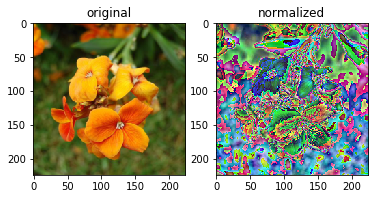

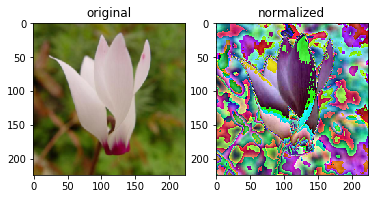

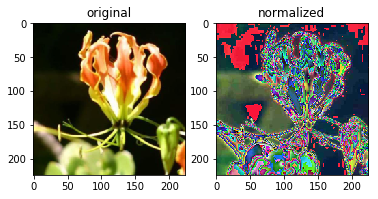

In [3]:
from hw4_code import *
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import transforms

# testing dataset
flower_dataset = FlowerDataset('..\\datasets\\flowersstuff\\102flowers\\flowers_data', mode='train')
flower_dataset_val = FlowerDataset('..\\datasets\\flowersstuff\\102flowers\\flowers_data', mode='val')

for i in range(3):
    flower1 = flower_dataset[i]
    print('label:',flower1['label'])
    image = transforms.ToPILImage()(flower1['image'])

    invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                         std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                    transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                         std = [ 1., 1., 1. ]),
                                    transforms.ToPILImage(),
                                   ])
    clear_image = invTrans(flower1['image'])

    plt.figure()
    plt.subplot(121)
    plt.imshow(clear_image)
    plt.title('original')
    plt.subplot(122)
    plt.imshow(image)
    plt.title('normalized')

We will then use resnet models to classify our flowers.

In [19]:
# Getting pretrained resnet
from torchvision import models

def get_pretrained_resnet(use_gpu=True):
    model = models.resnet18(pretrained=True)
    if use_gpu:
        model = model.cuda(0)
    return model

resnetmodel = get_pretrained_resnet()
resnet_dict = resnetmodel.state_dict()

In [20]:
# training with various learn rate
for lr in [0.1, 1, 10]:
    print("\n\nWith learning rate {},\n".format(lr))
    learnrate = lr
    optimizer = optim.SGD(resnetmodel.parameters(), lr=learnrate, momentum=0.9)

    trainedmodel = train_model(flower_dataset, resnetmodel, optimizer, 
                               epoch=5, mode='train', use_gpu=True, print_every=1)
    trainedmodel = train_model(flower_dataset_val, trainedmodel, optimizer, 
                               epoch=1, mode='val', use_gpu=True, print_every=1)



With learning rate 0.1,

[train] - Epoch 0..
      >> Epoch loss 1.84200 accuracy 0.032                      in 436.1029s
[train] - Epoch 1..
      >> Epoch loss 1.19028 accuracy 0.197                      in 447.7514s
[train] - Epoch 2..
      >> Epoch loss 0.84594 accuracy 0.354                      in 437.3213s
[train] - Epoch 3..
      >> Epoch loss 0.63037 accuracy 0.500                      in 438.2014s
[train] - Epoch 4..
      >> Epoch loss 0.48444 accuracy 0.625                      in 437.8016s
[val] - Epoch 0..
      >> Epoch loss 0.50749 accuracy 0.564                      in 30.7290s


With learning rate 1,

[train] - Epoch 0..
      >> Epoch loss 0.32693 accuracy 0.737                      in 438.2095s
[train] - Epoch 1..
      >> Epoch loss 0.06966 accuracy 0.976                      in 438.3346s
[train] - Epoch 2..
      >> Epoch loss 0.02628 accuracy 0.999                      in 437.9225s
[train] - Epoch 3..
      >> Epoch loss 0.01591 accuracy 1.000                

In [21]:
# now lets do the same thing, but train with an empty resnet

def get_empty_resnet(use_gpu=True):
    model = models.resnet18(pretrained=False)
    if use_gpu:
        model = model.cuda(0)
    return model

emptymodel = get_empty_resnet()
empty_dict = resnetmodel.state_dict()

In [22]:
# training with various learn rate
for lr in [0.1, 1, 10]:
    print("\n\nWith learning rate {},\n".format(lr))
    learnrate = lr
    optimizer = optim.SGD(emptymodel.parameters(), lr=learnrate, momentum=0.9)

    trainedmodel = train_model(flower_dataset, emptymodel, optimizer, 
                               epoch=5, mode='train', use_gpu=True, print_every=1)
    trainedmodel = train_model(flower_dataset_val, trainedmodel, optimizer, 
                               epoch=1, mode='val', use_gpu=True, print_every=1)



With learning rate 0.1,

[train] - Epoch 0..
      >> Epoch loss 1.64123 accuracy 0.019                      in 437.0512s
[train] - Epoch 1..
      >> Epoch loss 1.44798 accuracy 0.039                      in 436.9365s
[train] - Epoch 2..
      >> Epoch loss 1.33094 accuracy 0.050                      in 437.3202s
[train] - Epoch 3..
      >> Epoch loss 1.25442 accuracy 0.065                      in 436.8402s
[train] - Epoch 4..
      >> Epoch loss 1.19877 accuracy 0.071                      in 436.8860s
[val] - Epoch 0..
      >> Epoch loss 1.15961 accuracy 0.076                      in 28.8649s


With learning rate 1,

[train] - Epoch 0..
      >> Epoch loss 1.08050 accuracy 0.087                      in 436.6231s
[train] - Epoch 1..
      >> Epoch loss 0.97139 accuracy 0.114                      in 436.3192s
[train] - Epoch 2..
      >> Epoch loss 0.91377 accuracy 0.144                      in 435.9403s
[train] - Epoch 3..
      >> Epoch loss 0.86773 accuracy 0.166                

In [29]:
# now lets do the same thing, but train with an unfrozen resnet
import torch.nn as nn

def get_unfrozen_resnet(numcl, use_gpu=True):
    model = models.resnet18(pretrained=False)
    for param in model.parameters():
        param.requires_grad = False
    
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, numcl)
    
    if use_gpu:
        model = model.cuda(0)
    return model

unfrozenmodel = get_unfrozen_resnet(102)
unfrozen_dict = resnetmodel.state_dict()

In [31]:
# training with various learn rate
for lr in [0.1, 1, 10]:
    print("\n\nWith learning rate {},\n".format(lr))
    learnrate = lr
    # optimizing only for fully-connected layers
    optimizer = optim.SGD(unfrozenmodel.fc.parameters(), lr=learnrate, momentum=0.9)

    trainedmodel = train_model(flower_dataset, unfrozenmodel, optimizer, 
                               epoch=5, mode='train', use_gpu=True, print_every=1)
    trainedmodel = train_model(flower_dataset_val, trainedmodel, optimizer, 
                               epoch=1, mode='val', use_gpu=True, print_every=1)



With learning rate 0.1,

[train] - Epoch 0..
      >> Epoch loss 1.15228 accuracy 0.028                      in 121.3677s
[train] - Epoch 1..
      >> Epoch loss 1.12945 accuracy 0.037                      in 120.7015s
[train] - Epoch 2..
      >> Epoch loss 1.12416 accuracy 0.045                      in 122.1937s
[train] - Epoch 3..
      >> Epoch loss 1.12162 accuracy 0.047                      in 121.4762s
[train] - Epoch 4..
      >> Epoch loss 1.11976 accuracy 0.051                      in 121.7667s
[val] - Epoch 0..
      >> Epoch loss 1.11822 accuracy 0.047                      in 27.9434s


With learning rate 1,

[train] - Epoch 0..
      >> Epoch loss 1.12177 accuracy 0.052                      in 121.6749s
[train] - Epoch 1..
      >> Epoch loss 1.11096 accuracy 0.057                      in 121.2603s
[train] - Epoch 2..
      >> Epoch loss 1.10197 accuracy 0.060                      in 121.2079s
[train] - Epoch 3..
      >> Epoch loss 1.09436 accuracy 0.062                

### Coding Part 2

In [32]:
from hw4_code2 import *
import numpy as np

from samplestr.txt:
samples with positive class: 2000 
samples with negative class: 8000


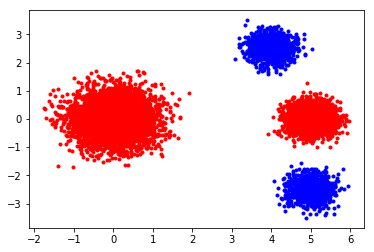

In [33]:
print("from samplestr.txt:")
data_tr, label_tr = from_text('samplestr.txt')
plot_dataset(data_tr, label_tr)


from sampleste.txt:
samples with positive class: 2000 
samples with negative class: 8000


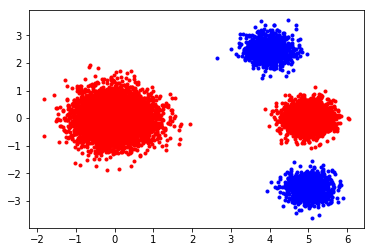

In [34]:
print("from sampleste.txt:")
data_te, label_te = from_text('sampleste.txt')
plot_dataset(data_te, label_te)

In [60]:
'''
Creating a new Neural Network
'''
from torch import nn
import torch.nn.functional as F

class OurNet(nn.Module):
    def __init__(self):
        super(OurNet, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        x = self.fc(x)
        return x

our_net = OurNet()
print(our_net.state_dict())

OrderedDict([('fc.weight', tensor([[-0.0193, -0.1866]])), ('fc.bias', tensor([ 0.6787]))])


In [61]:
# testing the Dataset subclass from hw4_code2

train_set = ImbaDataset('.', mode='train')
print('train:',train_set[2])
test_set = ImbaDataset('.', mode='test')
print('test:', test_set[2])

train: {'data': tensor([ 0.7959,  0.3896], dtype=torch.float64), 'label': tensor([ 0.], dtype=torch.float64)}
test: {'data': tensor([-0.5324, -0.7683], dtype=torch.float64), 'label': tensor([ 0.], dtype=torch.float64)}


In [133]:
# simple training
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.sampler import WeightedRandomSampler

our_net = OurNet().double()
optimizer = optim.SGD(our_net.parameters(), lr=0.1)
criterion = nn.BCEWithLogitsLoss()

def train_ournet(dataset, model, optimizer, criterion, batch_sampler=None, 
                 mode='train', balanced_acc=True):
    print_truecount = True
    
    if batch_sampler:
        loader = DataLoader(dataset, batch_sampler=batch_sampler)
    else:
        loader = DataLoader(dataset, batch_size=128, shuffle=True)
        
    running_loss = 0
    running_corrects = 0
    total_data = 0
    # for balanced sampling
    true_pos = 0
    true_neg = 0
    total_positive = 0
    total_negative = 0
    
    if mode == 'train':
        model.train()
    else:
        model.eval()
    
    for inputdata in loader:
        if mode == 'train': optimizer.zero_grad()
            
        data = Variable(inputdata['data']).float()
        labels = Variable(inputdata['label']).float().view(-1,1)
        if print_truecount:
            print('First batch true count:', labels.sum().item(), 'out of', len(labels), 
                  "({}%)".format(labels.sum().item() * 100 / len(labels)))
            print_truecount = False
        
        outputs = model(data)
        predictions = (outputs > 0)
        
        # balanced stuff
        true_pos += (predictions.double() * labels.double()).sum().item()
        true_neg += ((1-predictions).double() * (1-labels).double()).sum().item()
        total_positive += labels.sum().item()
        total_negative += (1-labels).sum().item()

        loss = criterion(outputs, labels)
        if mode == 'train':
            loss.backward()
            optimizer.step()    
            
        # balanced stuff
#         total_data += (labels * (positive_weight-1) + 1).sum().item()
        total_data += len(labels)
        corrects = (predictions.float().cpu() == labels.cpu()).double()
#         weights = (positive_weight - 1) * labels.cpu() + 1
        
        running_corrects += (corrects).sum().item() 
        running_loss += loss.item()
        
#     print("total data:", total_data)
    running_corrects /= (total_data)#float(128*100)
    if mode == 'train':
        print("Trained with accuracy {} and loss {}".format(running_corrects, running_loss))
    elif mode == 'test':
        print("Tested with accuracy {} and loss {}".format(running_corrects, running_loss))
        
    if balanced_acc:
        true_pos_rate = true_pos/total_positive
        true_neg_rate = true_neg/(total_negative)
        b_acc = (true_pos_rate + true_neg_rate) / 2
#         print("   True Positive:", true_pos)
#         print("   True Negative:", true_neg)
        print("   True Positive Rate:", true_pos_rate)
        print("   True Negative Rate:", true_neg_rate)
        print("       Balanced Accuracy:", b_acc)
        print('-----')
    return model


First batch true count: 34.0 out of 128 (26.5625%)
Trained with accuracy 0.691 and loss 51.22262632846832
   True Positive Rate: 0.245
   True Negative Rate: 0.8025
       Balanced Accuracy: 0.5237499999999999
-----
First batch true count: 32.0 out of 128 (25.0%)
Tested with accuracy 0.8 and loss 40.2351960837841
   True Positive Rate: 0.0
   True Negative Rate: 1.0
       Balanced Accuracy: 0.5
-----
First batch true count: 27.0 out of 128 (21.09375%)
Tested with accuracy 0.8 and loss 40.24165353178978
   True Positive Rate: 0.0
   True Negative Rate: 1.0
       Balanced Accuracy: 0.5
-----
samples with positive class: 2000 
samples with negative class: 8000


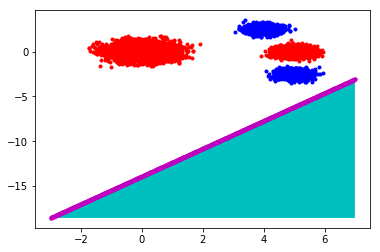

In [137]:
our_net = OurNet().float()
optimizer = optim.SGD(our_net.parameters(), lr=0.1)

our_net_trained = train_ournet(train_set, our_net, optimizer, criterion)
# for i in range(10):
#     our_net_trained = train_ournet(train_set, our_net_trained, optimizer, criterion)
with torch.no_grad():
    our_net_trained = train_ournet(train_set, our_net_trained, optimizer, criterion, mode='test')   
    our_net_trained = train_ournet(test_set, our_net_trained, optimizer, criterion, mode='test')
# print(our_net_trained.state_dict())

plot_dataset(data_tr, label_tr)
draw_model(our_net_trained)

To achieve 50-50 on minibatches, we need a Sampler subclass.

In [138]:
from random import shuffle

class OurBatchSampler(object):
    r"""
    Special batch sampler class that ensures a 50-50
    dataset classes.
    """

    def __init__(self, dataset, batch_size, iteration, random=False, start_shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.iteration = iteration
        self.random = random
        
        self.idx_plus = [idx for idx in range(len(dataset)) if dataset[idx]['label'].item() > 0]
        self.idx_minus = [idx for idx in range(len(dataset)) if idx not in self.idx_plus]
        
        if start_shuffle:
            shuffle(self.idx_plus)
            shuffle(self.idx_minus)

    def __iter__(self):
        batch = []
        for i in range(self.iteration):
            if self.random:
                idplus = np.random.choice(self.idx_plus, self.batch_size // 2).tolist()
                idminus = np.random.choice(self.idx_minus, self.batch_size // 2).tolist()
            else:
                idplus = [self.get_positive_det() for i in range(self.batch_size // 2)]
                idminus = [self.get_negative_det() for i in range(self.batch_size // 2)]
            batch += idplus + idminus
                
            yield batch
            batch = []
            
    def get_positive_det(self):
        idx = self.idx_plus[0]
        self.idx_plus = self.idx_plus[1:] + [idx]
        return idx
        
    def get_negative_det(self):
        idx = self.idx_minus[0]
        self.idx_minus = self.idx_minus[1:] + [idx]
        return idx

    def __len__(self):
        return self.batch_size * self.iteration

train_sampler = OurBatchSampler(train_set, 128, 100)
print('train sampler built')
test_sampler = OurBatchSampler(test_set, 128, 100)
print('test sampler built')

train sampler built
test sampler built



Without 50-50 sampling:
First batch true count: 30.0 out of 128 (23.4375%)
Trained with accuracy 0.7929 and loss 39.92120036482811
   True Positive Rate: 0.065
   True Negative Rate: 0.974875
       Balanced Accuracy: 0.5199375
-----
Test: accuracy
First batch true count: 34.0 out of 128 (26.5625%)
Tested with accuracy 0.8 and loss 35.79552164673805
   True Positive Rate: 0.0
   True Negative Rate: 1.0
       Balanced Accuracy: 0.5
-----
samples with positive class: 2000 
samples with negative class: 8000


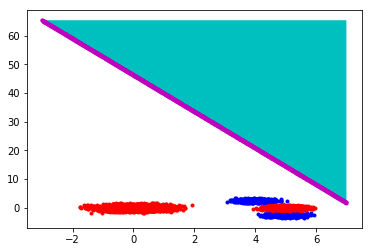

In [139]:
our_net = OurNet().float()
optimizer = optim.SGD(our_net.parameters(), lr=0.1)
print('\nWithout 50-50 sampling:')
our_net_trained = train_ournet(train_set, our_net, optimizer, criterion)
# print('Train: accuracy')
# our_net_trained = train_ournet(train_set, our_net_trained, optimizer, 
#                                criterion, mode='test')   

with torch.no_grad():
    print('Test: accuracy')
    our_net_trained = train_ournet(test_set, our_net_trained, optimizer, 
                                   criterion, mode='test')
    plot_dataset(data_tr, label_tr)
    draw_model(our_net_trained)





With 50-50 sampling:
First batch true count: 64.0 out of 128 (50.0%)
Trained with accuracy 0.777265625 and loss 58.62924283742905
   True Positive Rate: 0.9240625
   True Negative Rate: 0.63046875
       Balanced Accuracy: 0.7772656250000001
-----
Test: accuracy
First batch true count: 30.0 out of 128 (23.4375%)
Tested with accuracy 0.7 and loss 48.3607052564621
   True Positive Rate: 1.0
   True Negative Rate: 0.625
       Balanced Accuracy: 0.8125
-----
samples with positive class: 2000 
samples with negative class: 8000
OrderedDict([('fc.weight', tensor([[ 0.3968,  0.0705]])), ('fc.bias', tensor([-1.0422]))])


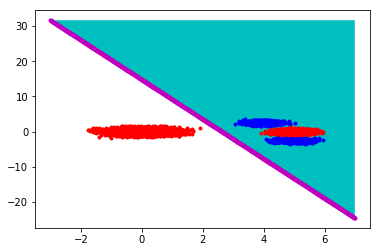

In [140]:
our_net = OurNet().float()
optimizer = optim.SGD(our_net.parameters(), lr=0.1)
print('\n\n\n')
print('With 50-50 sampling:')
our_net_trained = train_ournet(train_set, our_net, optimizer, criterion, 
                               batch_sampler=train_sampler)

with torch.no_grad():
    print('Test: accuracy')
    our_net_trained = train_ournet(test_set, our_net_trained, optimizer, 
                                   criterion, mode='test')
    plot_dataset(data_tr, label_tr)
    draw_model(our_net_trained)
    print(our_net_trained.state_dict())